# Elastoplasticity with exponential isotropic hardening

$\newcommand{\beps}{\boldsymbol{\varepsilon}}
\newcommand{\bepsp}{\boldsymbol{\varepsilon}^\text{p}}
\newcommand{\Depsp}{\Delta\boldsymbol{\varepsilon}^\text{p}}
\newcommand{\bepsel}{\boldsymbol{\varepsilon}^\text{el}}
\newcommand{\bu}{\boldsymbol{u}}
\newcommand{\CC}{\mathbb{C}}
\newcommand{\KK}{\mathbb{K}}
\newcommand{\JJ}{\mathbb{J}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\Kk}{\mathcal{K}}
\newcommand{\tr}{\operatorname{tr}}
\newcommand{\dev}{\operatorname{dev}}
\newcommand{\bf}{\boldsymbol{f}}
\newcommand{\dOm}{\text{d}\Omega}
\DeclareMathOperator*{argmin}{arg\min}
\newcommand{\bC}{\boldsymbol{C}}
\newcommand{\bQ}{\boldsymbol{Q}}
\newcommand{\bx}{\boldsymbol{x}}
\newcommand{\T}{^\text{T}}$

In this demo, we show how to formulate an elastoplastic problem using an incremental variational formulation. We particularize the behaviour to a plane strain von Mises yield criterion and an exponential isotropic hardening.

## Free-energy and dissipation potential

In the framework of generalized standard materials [[HAL75](#References)], the considered constitutive model is described by:

* a choice of state variables consisting of the total strain $\beps$, the plastic strain $\bepsp$ and the cumulated equivalent plastic strain $p$;

* its free energy density $\psi$ consisting of a stored elastic and hardening potentials:
\begin{equation}
\psi(\beps,\bepsp,p) = \psi_\text{el}(\beps-\bepsp)+\psi_\text{h}(p)
\end{equation}

* its dissipation potential $\phi(\dot{\bepsp},\dot{p})$


We will assume isotropic linear elasticity:
\begin{equation}\psi_\text{el}(\beps^\text{el}) = \dfrac{1}{2}\beps^\text{el}:\CC:\beps^\text{el} = \dfrac{\kappa}{2}(\tr(\beps^\text{el}))^2 + \mu \dev(\beps^\text{el}):\dev(\beps^\text{el})
\end{equation}

where $\kappa$ is the compressibility modulus, $\mu$ the shear modulus and $\dev(\beps^\text{el})$ the deviatoric elastic strain. Note that splitting the elasic energy into spherical and deviatoric components will later prove useful for the conic reformulation

The hardening potential is assumed to be of exponential type as follows:
\begin{equation}
\psi_\text{h}(p) = (\sigma_u-\sigma_0)(p+\frac{1}{\omega}\exp(-\omega p))
\end{equation}

where $\sigma_0$ (resp. $\sigma_u$) is the initial (resp. ultimate) yield strength and $\omega$ a saturation parameter.

Finally, we assume a $J_2$-plasticity dissipation potential:
\begin{equation}
\phi(\dot{\bepsp}, \dot{p}) = \begin{cases}
\sqrt{\frac{2}{3}}\sigma_0\|\dot{\bepsp}\|=\sigma_0\dot{p} & \text{if } \tr(\dot{\bepsp})=0 \\
+\infty & \text{otherwise}
\end{cases}
\end{equation}

Note that we included in the above the link between the scalar cumulated plastic strain rate and the plastic strain rate tensor $\dot{p}=\sqrt{\frac{2}{3}}\|\dot{\bepsp}\|$ which will later slightly be reformulated in conic form.


## Incremental pseudo-potential

It can be shown that the solution at time $t_{n+1}$ in terms of displacement $\bu$, plastic strain $\bepsp$ and cumulated plastic strain $p$ can be obtained as the solution to the following minimization principle [[ORT99](#References)]:
\begin{equation}
(\bu_{n+1},\bepsp_{n+1},p_{n+1}) = \argmin_{(\bu,\bepsp,p)} \int_{t_n}^{t_{n+1}}\int_{\Omega}(\dot{\psi}(\beps,\bepsp, p)+\phi(\dot{\bepsp},\dot{p}))\dOm\,\text{dt} - \int_{t_n}^{t_{n+1}} \mathcal{P}_\text{ext}\,\text{dt}
\end{equation}

where $\beps = \nabla^s\bu$, $\mathcal{P}_\text{ext}$ is the power of external loads which we assume to consist only of fixed body forces $\bf_{n+1}$ on the time step.

Further introducing a backward-Euler approximation for the plastic strain variables evolution : 
\begin{equation}
\dot{\bepsp} \approx \dfrac{\Depsp}{\Delta t}, \quad \dot{p}\approx\dfrac{\Delta p}{\Delta t}
\end{equation}

where $\Depsp = \bepsp-\bepsp_n$ and $\Delta p=p-p_n$, we have:
\begin{equation}
(\bu_{n+1},\bepsp_{n+1},p_{n+1}) \approx \argmin_{(\bu,\bepsp,p)} \int_{\Omega}\left(\psi(\beps,\bepsp, p)-\psi(\beps_n,\bepsp_n, p_n)+\Delta t\phi\left(\dfrac{\Depsp}{\Delta t},\dfrac{\Delta p}{\Delta t}\right)\right)\dOm - \int_\Omega \bf_{n+1}\cdot(\bu-\bu_n) \dOm
\end{equation}

which is a variational problem involving an incremental pseudo-potential:

\begin{align*}
J(\beps,\bepsp, p) &= \psi(\beps,\bepsp, p)-\psi(\beps_n,\bepsp_n, p_n)+\Delta t\phi\left(\dfrac{\Depsp}{\Delta t},\dfrac{\Delta p}{\Delta t}\right)\\
&= \psi(\beps,\bepsp, p)-\psi(\beps_n,\bepsp_n, p_n)+\phi(\Depsp,\Delta p)
\end{align*}

in which the time increment $\Delta t$ disappears since the behaviour is rate-independent ($\phi$ being a positively homogeneous convex function).

## Conic reformulation and implementation

The above incremental potential consists of three different terms: the elastic energy $\psi_\text{el}(\beps-\bepsp)$, the hardening potential $\psi_\text{h}(p)$ and the dissipation potential $\phi(\Depsp,\Delta p)$, the free energy evaluated at time $t_n$ being a constant which can be ignored in the energy minimization process. We now discuss the conic reformulation for each of these three terms.

### Conic reformulation of the elastic energy

The elastic energy density is a quadratic form of the elastic strain $\bepsel$ which we denote as $\frac{1}{2}\bx\T \bC \bx$. Obtaining a conic representation of a quadratic form requires going through a Cholesky factorization of the matrix $\bC=\bQ\T\bQ$ so that $\frac{1}{2}\bx\T \bC \bx = \frac{1}{2}\|\bQ\bx\|_2^2$. Although this process could be done algebraically using vector notations and the matrix representation of the elastic moduli tensor $\CC$, it can also be done directly using tensor notations, indeed the latter can also be expressed as:
\begin{equation}
\CC = 3\kappa \JJ + 2\mu \KK
\end{equation}
where $\JJ$ and $\KK$ are the classical spherical and deviatoric projectors i.e. such that $\JJ:\beps=\dfrac{1}{3}\tr(\beps)$ and $\KK:\beps=\dev(\beps)$ for any symmetric second-rank tensor $\beps$. These fourth-rank tensors are orthogonal projectors i.e.:
\begin{equation}
\JJ:\JJ = \JJ, \quad \KK:\KK = \KK, \quad \JJ:\KK=0
\end{equation}

Using this result, we can easily define the factorization of the elastic moduli tensor as follows:
\begin{equation}
\mathbb{Q} = \sqrt{3\kappa}\JJ+\sqrt{2\mu}\KK
\end{equation}
such that $\CC=\mathbb{Q}:\mathbb{Q}$. 

Let us now import the various functions we will need and define some physical constants. The action of the $\mathbb{Q}$ tensor on a strain tensor is implemented in the function `factorized_elastic_term(eps)`.

In [2]:
from ufl import as_matrix, as_vector, sqrt, dot, sym, grad, tr, Identity, diag
from dolfin import (
    RectangleMesh,
    Point,
    Expression,
    DirichletBC,
    Function,
    Constant,
    VectorFunctionSpace,
    dx,
    plot,
    XDMFFile,
)
from fenics_optim import (
    MosekProblem,
    ConvexFunction,
    QuadraticTerm,
    Quad,
    Exp,
    tail,
    concatenate,
    to_vect,
    to_mat,
)
import matplotlib.pyplot as plt
import numpy as np

# elastic parameters
E = Constant(210e3)
nu = Constant(0.3)
# yield stress
sig0 = Constant(450.0)
# ultimate stress
sigu = Constant(715.0)
# Saturation parameter
om = Constant(50.0)


mu = E / 2 / (1 + nu)
lamb = E * nu / (1 + nu) / (1 - 2 * nu)
kappa = lamb + 2 / 3 * mu
def dev_3D(eps):
    return as_matrix([[eps[0, 0], eps[0, 1], 0],
                      [eps[0, 1], eps[1, 1], 0],
                      [0, 0, 0]]) - tr(eps)/3*Identity(3)
def factorized_elastic_term(eps):
    return sqrt(3*kappa)*tr(eps)/3*Identity(3) + sqrt(2*mu)*dev_3D(eps)



### Hardening stored energy

Let us now consider the hardening potential:
\begin{equation}
\psi_\text{h}(p) = (\sigma_u-\sigma_0)(p+\frac{1}{\omega}\exp(-\omega p))
\end{equation}

which consists of a linear and an exponential term. This potential defines the following hardening thermodynamic force:
\begin{equation}
R(p) = (\sigma_u-\sigma_0)(1-\exp(-\omega p))
\end{equation}
which will increase the yield stress from $\sigma_0$ at $p=0$ to $\sigma_u$ when $p\to\infty$.

Regarding the conic formulation, we need to reformulate the exponential term as follows:

\begin{equation}
\exp(-\omega p) = \min \:r_0 \quad \text{s.t. } \exp(-\omega p) \leq r_0
\end{equation}

This non-linear constraint can be reformulated using an *exponential* cone defined as:
\begin{equation}
\Kk_\text{exp} = \{\boldsymbol{z} \in \RR^{3} \text{ s.t. } \boldsymbol{z}=(z_0, z_1, z_2) \text{ and } z_0 \geq z_1\exp(z_2/z_1), \:\: z_0,z_1\geq 0\}
\end{equation}
as follows:
\begin{equation}
\exp(-\omega p) \leq r_0 \quad \Leftrightarrow \quad r_1=1, \:, r_2=-\omega p, \: (r_0, r_1, r_2)\in \Kk_\text{exp}
\end{equation}
the implementation of which reads as:

In [3]:
class HardeningStoredEnergy(ConvexFunction):
    def conic_repr(self, p):
        r = self.add_var(dim=3, cone=Exp(3))
        self.add_eq_constraint(r[1], b=1)
        self.add_eq_constraint(r[2] + om * p)
        self.set_linear_term((sigu - sig0) * (p + 1 / om * r[0]))

### Plastic dissipation potential

Finally, we reformulate the plastic dissipation potential by introducing a slack variable $t$ as follows:
\begin{equation}
\begin{array}{rl} \phi(\Depsp, \Delta p) = \min  &\sqrt{\frac{2}{3}}\sigma_0 t\\
\text{s.t.} & \|\Depsp\|\leq t \\
& \tr(\Depsp)=0 \end{array}
\end{equation}

Now, recall that we must also enforce the link between $\Depsp$ and $\Delta p$ which is $\sqrt{\frac{2}{3}}\|\Depsp\| = \Delta p$. We could add this as an extra constraint but we can benefit here from the presence of the slack variable $t$ to use $\Delta p$ instead for the conic reformulation of the norm as follows:
\begin{equation}
\begin{array}{rl} \phi(\Depsp, \Delta p) = \min & \sigma_0 \Delta p\\
\text{s.t.} & \sqrt{\frac{2}{3}}\|\Depsp\|\leq \Delta p \\
& \tr(\Depsp)=0 \end{array}
\end{equation}
where it is clear that the equality will be enforced at the optimum.

Finally, we introduce $Y_0 = \Delta p = p-p_n$ and $\bar{\boldsymbol{Y}} = \sqrt{\frac{2}{3}}(\bepsp-\bepsp_n)$ so that the conic constraint $\|\bar{\boldsymbol{Y}}\|\leq Y_0$ now becomes $\boldsymbol{Y}=( Y_0,\bar{\boldsymbol{Y}})  \in \mathcal{Q}_4$.

The concrete implementation reads as follows accounting for the fact that `vonMisesDissipation` will be a function of $\texttt{X}=(p,\bepsp)$:

In [4]:
class vonMisesDissipation(ConvexFunction):
    def conic_repr(self, X):
        p = X[0]
        epsp = tail(X)
        Y = self.add_var(4, cone=Quad(4))

        Q = sqrt(2 / 3) * diag(as_vector([1.0, 1.0, sqrt(2.0)])) # used for Voigt notation for tensors
        self.add_eq_constraint(dot(Q, epsp) - tail(Y), b=dot(Q, epsp_old))
        self.add_eq_constraint(tr(to_mat(epsp)))
        self.add_eq_constraint(p - Y[0], b=p_old)
        self.set_linear_term(sig0 * Y[0])

## Numerical illustration

We consider a 2D rectangular domain of length $L=5$ and height $H=0.5$, fixed on both lateral extremities and subjected to a uniform downwards vertical body force $\bf=-f\be_y$. The domain is meshed with $50\times 20$ elements on the boundaries. The displacement field is discretized using a continuous quadratic Lagrange function space whereas internal state variables are represented using a discontinuous piecewise affine space.

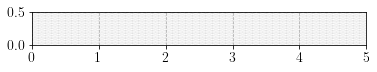

In [6]:
Nx, Ny = 50, 20
L, H = 5.0, 0.5
mesh = RectangleMesh(Point(0.0, 0.0), Point(L, H), Nx, Ny, "crossed")
vol = L * H
plot(mesh, linewidth=0.05)
plt.show()

# P2 interpolation for velocity
V = VectorFunctionSpace(mesh, "CG", 2)
Vepsp = VectorFunctionSpace(mesh, "DG", 1, dim=3)
Vp = Vepsp.sub(0).collapse()

p_old = Function(Vp, name="Previous cumulated plastic strain")
epsp_old = Function(Vepsp, name="Previous plastic strain")

bc = DirichletBC(V, Constant((0.0, 0.0)), f"near(x[0], 0) || near(x[0], {L})")

The beam is first loaded by progressively increasing the body force from 0 to $f^+=\dfrac{2}{\sqrt{3}}\dfrac{4\sigma_u H}{L^2}$ which is the theoretical limit load using a beam theory model. Then, we perform a full unloading up to $f=0$. The loading stage is imposed using 10 load increments, the unloading stage being elastic using only one increment.

In [7]:
f0 = float(4 * 2 / sqrt(3) * sig0 * H / L ** 2)
fu = float(f0 * sigu / sig0)
f = Expression(("0", "-fu*t"), t=0.0, fu=fu, degree=0)

out_file = XDMFFile("results.xdmf")
out_file.parameters["functions_share_mesh"] = True
out_file.parameters["flush_output"] = True

Nincr = 10
t_list = np.append(np.linspace(0.0, 1.0, Nincr+1), 0.0)
vmax = [0.0]
for (i, t) in enumerate(t_list[1:]):
    print(f"Increment {i+1}/{len(t_list)-1}")
    f.t = t

    prob = MosekProblem("Elastoplastic step")

    u, epsp, p = prob.add_var([V, Vepsp, Vp], bc=[bc, None, None], 
                              name=["Displacement", "Plastic strain", "Cumulated plastic strain"])

    eps_el = sym(grad(u)) - to_mat(epsp)

    elasticity = QuadraticTerm(to_vect(factorized_elastic_term(eps_el)), degree=2)
    hardening = HardeningStoredEnergy(p, degree=2)
    dissipation = vonMisesDissipation(concatenate([p, epsp]), degree=2)

    prob.add_convex_term(elasticity)
    prob.add_convex_term(hardening)
    prob.add_convex_term(dissipation)

    prob.add_obj_func(-dot(f, u) * dx)

    prob.parameters["log_level"] = 0
    prob.optimize()

    p_old.assign(p)
    epsp_old.assign(epsp)
    
    out_file.write(u, t)
    out_file.write(epsp, t)
    out_file.write(p, t)

    vmax.append(-u(L / 2, H / 2)[1])

Increment 1/11
Increment 2/11
Increment 3/11
Increment 4/11
Increment 5/11
Increment 6/11
Increment 7/11
Increment 8/11
Increment 9/11
Increment 10/11
Increment 11/11


Below, we plot the evolution of the beam downwards vertical displacement at its mid-span center point $(L/2,H/2)$ as a function of the imposed loading. One can observe an initial elastic phase up to $f\approx 0.4f^+$ followed by a strongly non-linear hardening phase. Note that the load $f=f^+$ can still be supported by the structure due to the difference between a 2D model as here and a 1D beam theory solution. Note that, for the present 2D structure with the considered mesh, the ultimate load is found to be around $f\approx 1.1f^+$. As expected for plasticity problems, the unloading stage is indeed elastic and exhibits a permanent residual deflection.

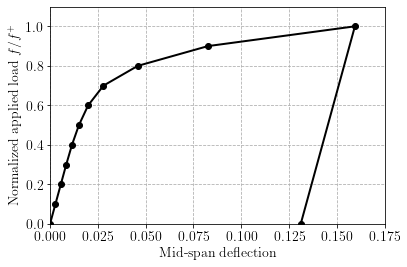

In [8]:
plt.figure()
plt.plot(vmax, t_list, "-ok")
plt.ylim(0, 1.1)
plt.xlabel("Mid-span deflection")
plt.ylabel(r"Normalized applied load $f/f^+$")
plt.show()

We now plot the distribution of equivalent plastic strain $p$ at the final stage. One can clearly observe the formation of plastic hinges near the clamped supports and a more diffuse plastic field at the beam mid-span. 

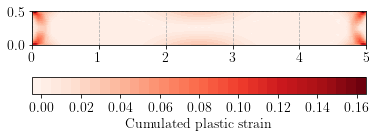

In [18]:
pl = plot(p, cmap="Reds")
cbar = plt.colorbar(pl, orientation="horizontal")
cbar.set_label(p.name())
plt.show()

We can also check that this incremental formulation is not very sensitive to the number of increments in a monotonic loading process.

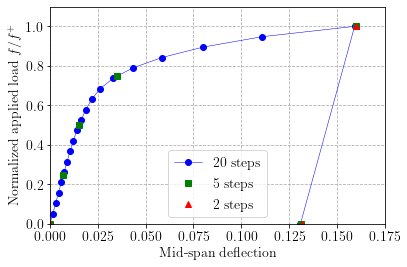

In [12]:
plt.figure()
for (l, style) in zip([20, 5, 2], ["-ob", "sg", "^r"]):
    X = np.loadtxt(f"results_ep_exp_hardening_{l}steps.csv")
    plt.plot(X[:, 0], X[:, 1], style, linewidth=0.5, label=f"{l} steps")
plt.xlabel("Mid-span deflection")
plt.ylabel(r"Normalized applied load $f/f^+$")
plt.ylim(0, 1.1)
plt.legend()
plt.savefig("increment_size_comparison.pdf")

## References

[HAL75] Halphen, B., & Nguyen, Q. S. (1975). Sur les matériaux standard généralisés. Journal de mécanique, 14, 39-63.

[ORT99] Ortiz, M., & Stainier, L. (1999). The variational formulation of viscoplastic constitutive updates. Computer methods in applied mechanics and engineering, 171(3-4), 419-444.